In [2]:
#STEP 1: IMPORT THE DATA AND LOAD THE DATA 
import pandas as pd
df = pd.read_csv("banking.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [8]:
# Filling the null values using median
df['y'].fillna(df['y'].median(), inplace=True)

In [9]:
df[["y"]].value_counts()

y
0    36548
1     4640
dtype: int64

In [10]:
#STEP 2 : STANDARDIZE THE DATA USING STANDARDIZATION AND LABEL ENCODING

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
# Identify numerical columns
df_nom = df[['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]

In [12]:
df_nom['age'] = SS.fit_transform(df_nom[['age']])
df_nom['campaign'] = SS.fit_transform(df_nom[['campaign']])
df_nom['pdays'] = SS.fit_transform(df_nom[['pdays']])
df_nom['previous'] = SS.fit_transform(df_nom[['previous']])
df_nom['emp_var_rate'] = SS.fit_transform(df_nom[['emp_var_rate']])
df_nom['cons_price_idx'] = SS.fit_transform(df_nom[['cons_price_idx']])
df_nom['cons_conf_idx'] = SS.fit_transform(df_nom[['cons_conf_idx']])
df_nom['euribor3m']  = SS.fit_transform(df_nom[['euribor3m']])
df_nom['nr_employed'] = SS.fit_transform(df_nom[['nr_employed']])
df_nom.head()

C:\Users\Think\AppData\Local\Temp\ipykernel_8656\1108587070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nom['age'] = SS.fit_transform(df_nom[['age']])
C:\Users\Think\AppData\Local\Temp\ipykernel_8656\1108587070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nom['campaign'] = SS.fit_transform(df_nom[['campaign']])
C:\Users\Think\AppData\Local\Temp\ipykernel_8656\1108587070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.381527,-0.565922,0.195414,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170
1,1.245157,-0.565922,0.195414,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115
2,-1.153816,0.156105,-5.117342,3.691766,-1.134279,0.828107,0.151810,-1.667578,-2.428157
3,-0.098268,-0.204909,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281
4,1.437075,-0.565922,-5.133393,1.671136,-1.898153,-2.374889,1.966794,-1.586859,-1.257233


In [14]:
#IDENTIFY THE CATEGORICAL DATA AND PERFORM LABEL ENCODING

from sklearn.preprocessing import  LabelEncoder
LE = LabelEncoder()
df_cat = df[["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome",]]

In [15]:
df_cat["job"] = LE.fit_transform(df_cat[["job"]])
df_cat["marital"] = LE.fit_transform(df_cat[["marital"]])
df_cat["education"] = LE.fit_transform(df_cat[["education"]])
df_cat["default"] = LE.fit_transform(df_cat[["default"]])
df_cat["housing"] = LE.fit_transform(df_cat[["housing"]])
df_cat["loan"] = LE.fit_transform(df_cat[["loan"]])
df_cat["contact"] = LE.fit_transform(df_cat[["contact"]])
df_cat["month"] = LE.fit_transform(df_cat[["month"]])
df_cat["day_of_week"] = LE.fit_transform(df_cat[["day_of_week"]])
df_cat["poutcome"] = LE.fit_transform(df_cat[["poutcome"]])
df_cat.head()

C:\Users\Think\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Think\AppData\Local\Temp\ipykernel_8656\3910133345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat["job"] = LE.fit_transform(df_cat[["job"]])
C:\Users\Think\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Think\AppData\Local\Temp\ipykernel_8656\3910133

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1,1,0,1,2,0,0,1,2,1
1,9,1,7,0,0,0,0,7,0,1
2,4,2,6,0,2,0,0,4,2,2
3,7,1,3,0,0,0,0,0,0,1
4,5,1,0,0,2,0,0,1,0,2


In [16]:
df_new = pd.concat([df_nom,df_cat],axis=1)
df_new

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.381527,-0.565922,0.195414,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170,1,1,0,1,2,0,0,1,2,1
1,1.245157,-0.565922,0.195414,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115,9,1,7,0,0,0,0,7,0,1
2,-1.153816,0.156105,-5.117342,3.691766,-1.134279,0.828107,0.151810,-1.667578,-2.428157,4,2,6,0,2,0,0,4,2,2
3,-0.098268,-0.204909,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281,7,1,3,0,0,0,0,0,0,1
4,1.437075,-0.565922,-5.133393,1.671136,-1.898153,-2.374889,1.966794,-1.586859,-1.257233,5,1,0,0,2,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.820911,-0.565922,0.195414,-0.349494,0.839061,1.536429,-0.280328,0.717649,0.845170,5,1,3,1,0,2,1,4,2,1
41184,-0.865939,-0.204909,0.195414,-0.349494,0.648092,0.722722,0.886447,0.714190,0.331680,3,1,0,1,0,0,1,6,2,1
41185,0.189609,0.156105,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,2,6,1,2,2,1,6,4,1
41186,0.765363,-0.204909,0.195414,-0.349494,-2.216433,-1.977538,2.939106,-1.660082,-2.069683,9,1,5,0,0,2,1,8,3,1


In [18]:
####STEP 4: DATA PARTITON
X = df_new.iloc[:,0:]
Y= df['y']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
## STEP 5: FIT THE MODELUSING DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=None)
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [21]:
Y_pred = dt.predict(X)

In [22]:
#metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y,Y_pred)
cm

array([[35814,   734],
       [  750,  3890]], dtype=int64)

In [23]:
# Calculate accuracy
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report
accuracy = accuracy_score(Y,Y_pred)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(Y,Y_pred,average='weighted')
recall = recall_score(Y,Y_pred, average='weighted')
f1 = f1_score(Y,Y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(Y,Y_pred))

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     36548
           1       0.84      0.84      0.84      4640

    accuracy                           0.96     41188
   macro avg       0.91      0.91      0.91     41188
weighted avg       0.96      0.96      0.96     41188



In [24]:
## STEP 5: FIT THE MODELUSING DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=None)
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [25]:
# Prompt: Predict the values on training and test data and calculate the accuracies for both
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.995174506828528
Testing Accuracy: 0.8378247147365866


In [26]:
# STEP 6: CROSS VALIDATION USING GINI INDEX 
#=========================================================
training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=i)
    dt = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=2)  #-->62,54
    #dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2) #-->66,53
    #dt = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=2) #-->71,52
    #dt = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=2) #-->77,51
    #dt = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=2) #-->82,50
    #dt = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_split=2) #-->87,49
    #dt = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2)#-->91,49
    dt.fit(X_train.values,Y_train)
    Y_pred_train = dt.predict(X_train.values)
    Y_pred_test  = dt.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 0.9
Cross validation - Test accuracy: 0.9


In [27]:
# Count the number of nodes in the tree                  #-->341,10/299,9/241,8/175,7/103,6
node_count = dt.tree_.node_count
# Count the depth of the tree
max_depth = dt.tree_.max_depth
print("Number of nodes:", node_count)
print("Depth of tree:", max_depth)

Number of nodes: 31
Depth of tree: 4


In [35]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [37]:
# Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                       'contact', 'month', 'day_of_week', 'poutcome']

In [39]:
# Using LabelEncoder to convert categorical columns to numerical format
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [40]:
# Split data into features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Initialize and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

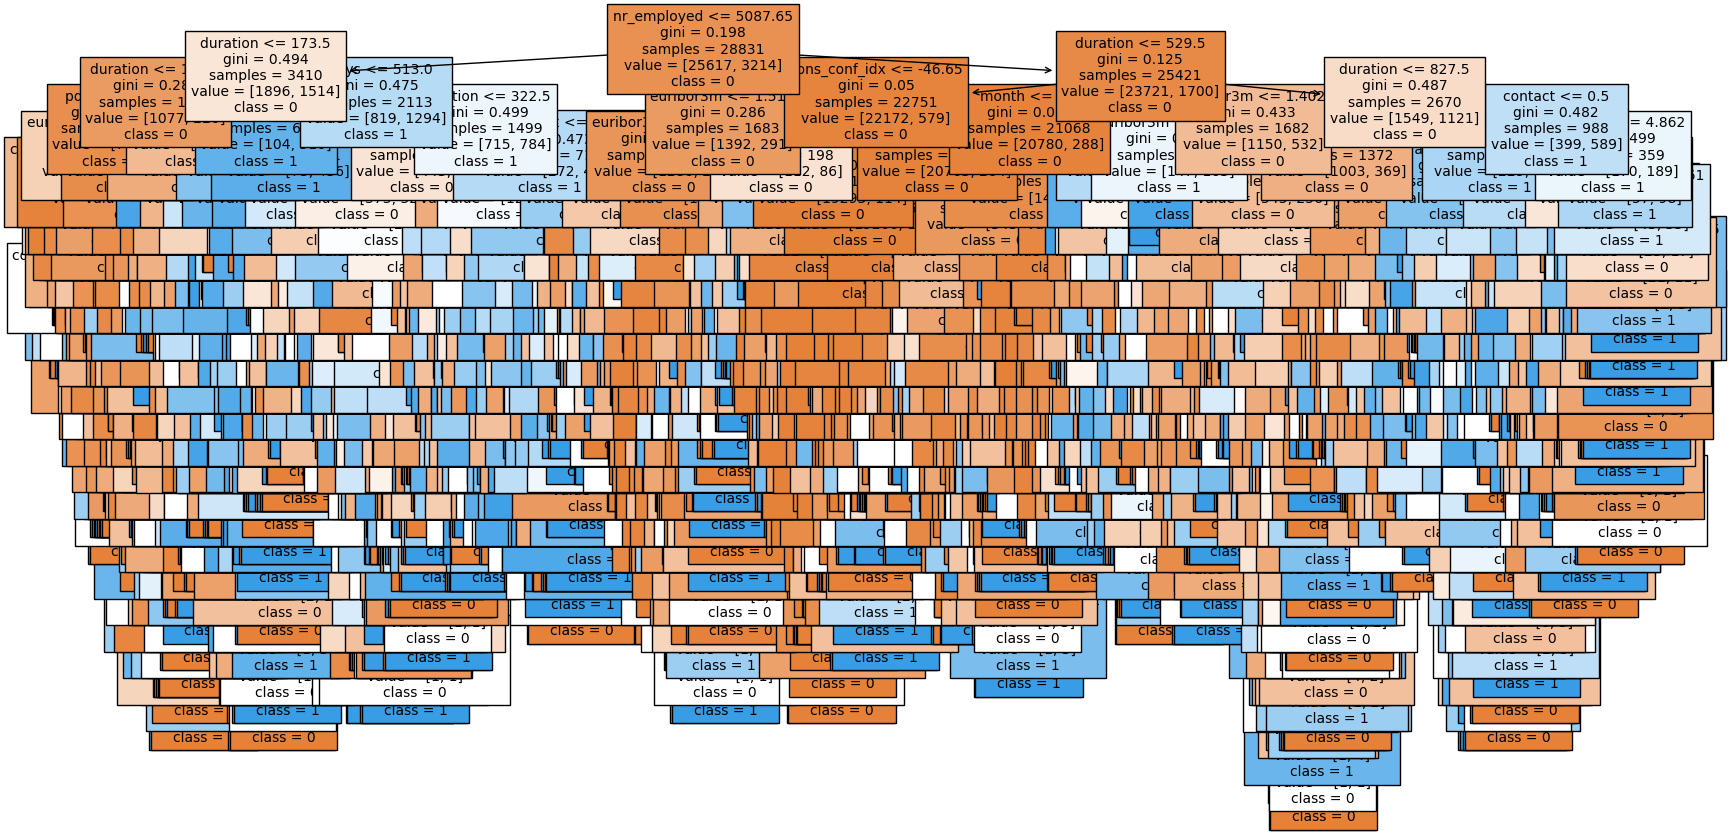

In [43]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, 
          feature_names=X.columns.tolist(), 
          class_names=['0', '1'],  # Correct class names based on your target variable
          filled=True, 
          fontsize=10)
plt.show()

In [45]:
#STEP 8:CROSS VALIDATION USING THE ENTROPY
#=========================================================
training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=i)
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)  #-->64,53
    #dt = DecisionTreeClassifier(criterion='entropy',max_depth=6)  #-->69,52
    #dt = DecisionTreeClassifier(criterion='entropy',max_depth=7)  #-->75,51
    #dt = DecisionTreeClassifier(criterion='entropy',max_depth=8)  #-->81,50
    #dt = DecisionTreeClassifier(criterion='entropy',max_depth=9)  #-->87,49
    #dt = DecisionTreeClassifier(criterion='entropy',max_depth=10) #-->92,48
    dt.fit(X_train.values,Y_train)
    Y_pred_train = dt.predict(X_train.values)
    Y_pred_test  = dt.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 0.92
Cross validation - Test accuracy: 0.91


In [46]:
# Count the number of nodes in the tree                  #-->341,10/299,9/241,8/175,7/103,6
node_count = dt.tree_.node_count
# Count the depth of the tree
max_depth = dt.tree_.max_depth
print("Number of nodes:", node_count)
print("Depth of tree:", max_depth)

Number of nodes: 63
Depth of tree: 5


In [53]:
from sklearn import tree
import matplotlib.pyplot as plt

In [54]:
# Convert feature names to a list
feature_names = X.columns.tolist()

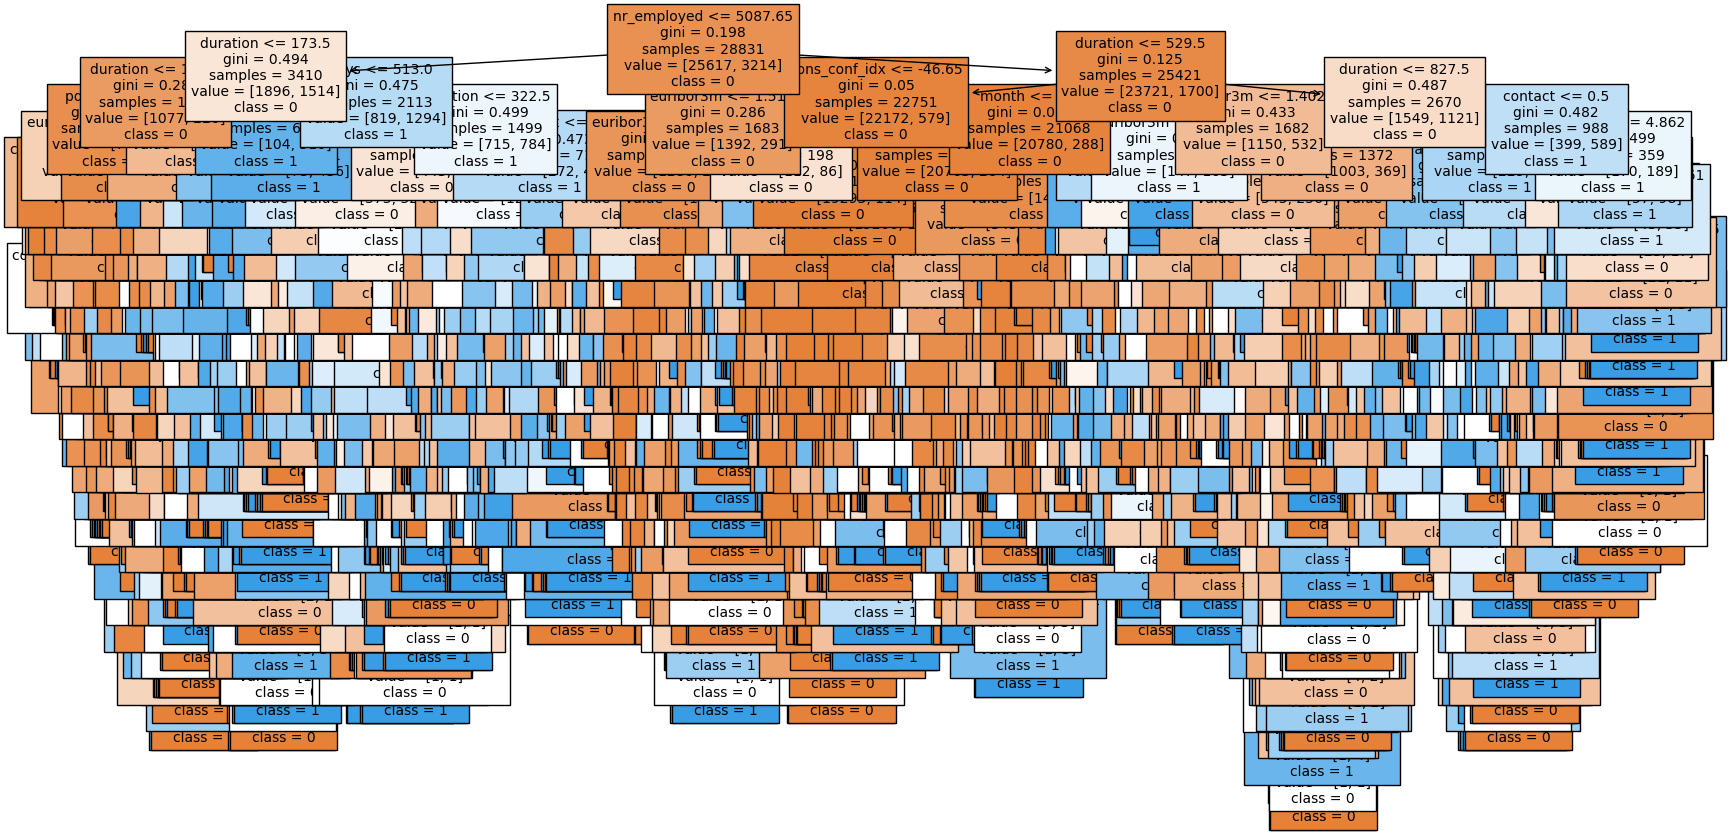

In [55]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, 
               feature_names=feature_names, 
               class_names=['0', '1'],  # Adjust based on your actual target variable classes
               filled=True, 
               fontsize=10)
plt.show()